In [0]:
import pandas as pd
import numpy as np

### Object Creation

In [0]:
# Creating a Series by passing a list of values, 
# letting pandas create a default integer index:
s = pd.Series([1, 3, 5, np.nan, 6, 8])

In [3]:
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [0]:
# Creating a DataFrame by passing a NumPy array, with a datetime index and labeled columns:
dates = pd.date_range('20190101', periods=6)

In [5]:
|dates

DatetimeIndex(['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04',
               '2019-01-05', '2019-01-06'],
              dtype='datetime64[ns]', freq='D')

In [0]:
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list('ABCD'))

In [7]:
df

,A,B,C,D
2019-01-01,-0.049889,1.326123,2.325906,-0.304167
2019-01-02,0.570879,1.009489,-0.571290,-0.649788
2019-01-03,-0.932381,-0.542501,-0.691113,0.187199
2019-01-04,0.059989,-0.101204,-0.687728,0.837987
2019-01-05,0.967556,-0.524111,1.454097,-0.197571
2019-01-06,-0.368568,-0.071524,0.942973,-0.234762


In [0]:
# Creating a DataFrame by passing a dict of objects that can be converted to series-like.
df2 = pd.DataFrame({'A': 1.,
                    'B': pd.Timestamp('20130102'),
                    'C': pd.Series(1, index=list(range(4)), dtype='float32'),
                    'D': np.array([3] * 4, dtype='int32'),
                    'E': pd.Categorical(["test", "train", "test", "train"]),
                    'F': 'foo'})

In [9]:
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


In [10]:
# The columns of the resulting DataFrame have different dtypes.
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

In [11]:
df

,A,B,C,D
2019-01-01,-0.049889,1.326123,2.325906,-0.304167
2019-01-02,0.570879,1.009489,-0.571290,-0.649788
2019-01-03,-0.932381,-0.542501,-0.691113,0.187199
2019-01-04,0.059989,-0.101204,-0.687728,0.837987
2019-01-05,0.967556,-0.524111,1.454097,-0.197571
2019-01-06,-0.368568,-0.071524,0.942973,-0.234762


### Viewing Data

In [12]:
# Here is how to view the top rows of the frame:
df.head(3)

,A,B,C,D
2019-01-01,-0.049889,1.326123,2.325906,-0.304167
2019-01-02,0.570879,1.009489,-0.571290,-0.649788
2019-01-03,-0.932381,-0.542501,-0.691113,0.187199


In [13]:
# or
df.head(3)

,A,B,C,D
2019-01-01,-0.049889,1.326123,2.325906,-0.304167
2019-01-02,0.570879,1.009489,-0.571290,-0.649788
2019-01-03,-0.932381,-0.542501,-0.691113,0.187199


In [14]:
# Here is how to view the bottom rows of the frame:
df.tail(2)

,A,B,C,D
2019-01-05,0.967556,-0.524111,1.454097,-0.197571
2019-01-06,-0.368568,-0.071524,0.942973,-0.234762


In [15]:
# Display the index
df.index

DatetimeIndex(['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04',
               '2019-01-05', '2019-01-06'],
              dtype='datetime64[ns]', freq='D')

In [16]:
# Display the columns
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [17]:
# DataFrame.values gives a NumPy representation of the underlying data
df.values

array([[-0.04988936,  1.32612251,  2.32590634, -0.30416682],
       [ 0.57087908,  1.00948934, -0.57128997, -0.64978756],
       [-0.93238088, -0.54250061, -0.69111268,  0.18719936],
       [ 0.05998949, -0.10120399, -0.68772842,  0.83798657],
       [ 0.96755589, -0.52411107,  1.45409652, -0.19757078],
       [-0.36856792, -0.07152407,  0.94297281, -0.23476201]])

In [0]:
# note that DataFrame.values does not include the index or column labels in the output.

In [19]:
# describe() shows a quick statistic summary of your data:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.041264,0.182712,0.462141,-0.060184
std,0.672773,0.795201,1.296840,0.514669
min,-0.932381,-0.542501,-0.691113,-0.649788
25%,-0.288898,-0.418384,-0.658619,-0.286816
50%,0.005050,-0.086364,0.185841,-0.216166
75%,0.443157,0.739236,1.326316,0.091007
max,0.967556,1.326123,2.325906,0.837987


In [20]:
# Transposing your data:
df.T

,2019-01-01 00:00:00,2019-01-02 00:00:00,2019-01-03 00:00:00,2019-01-04 00:00:00,2019-01-05 00:00:00,2019-01-06 00:00:00
A,-0.049889,0.570879,-0.932381,0.059989,0.967556,-0.368568
B,1.326123,1.009489,-0.542501,-0.101204,-0.524111,-0.071524
C,2.325906,-0.571290,-0.691113,-0.687728,1.454097,0.942973
D,-0.304167,-0.649788,0.187199,0.837987,-0.197571,-0.234762


In [21]:
df

,A,B,C,D
2019-01-01,-0.049889,1.326123,2.325906,-0.304167
2019-01-02,0.570879,1.009489,-0.571290,-0.649788
2019-01-03,-0.932381,-0.542501,-0.691113,0.187199
2019-01-04,0.059989,-0.101204,-0.687728,0.837987
2019-01-05,0.967556,-0.524111,1.454097,-0.197571
2019-01-06,-0.368568,-0.071524,0.942973,-0.234762


In [22]:
# Sorting by an axis:
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2019-01-01,-0.304167,2.325906,1.326123,-0.049889
2019-01-02,-0.649788,-0.571290,1.009489,0.570879
2019-01-03,0.187199,-0.691113,-0.542501,-0.932381
2019-01-04,0.837987,-0.687728,-0.101204,0.059989
2019-01-05,-0.197571,1.454097,-0.524111,0.967556
2019-01-06,-0.234762,0.942973,-0.071524,-0.368568


In [23]:
# Sorting by values
df.sort_values(by='B')

,A,B,C,D
2019-01-03,-0.932381,-0.542501,-0.691113,0.187199
2019-01-05,0.967556,-0.524111,1.454097,-0.197571
2019-01-04,0.059989,-0.101204,-0.687728,0.837987
2019-01-06,-0.368568,-0.071524,0.942973,-0.234762
2019-01-02,0.570879,1.009489,-0.571290,-0.649788
2019-01-01,-0.049889,1.326123,2.325906,-0.304167


In [24]:
df

,A,B,C,D
2019-01-01,-0.049889,1.326123,2.325906,-0.304167
2019-01-02,0.570879,1.009489,-0.571290,-0.649788
2019-01-03,-0.932381,-0.542501,-0.691113,0.187199
2019-01-04,0.059989,-0.101204,-0.687728,0.837987
2019-01-05,0.967556,-0.524111,1.454097,-0.197571
2019-01-06,-0.368568,-0.071524,0.942973,-0.234762


### SELECTION

In [25]:
# Selecting a single column, which yields a Series, equivalent to df.A:
df['A']

2019-01-01   -0.049889
2019-01-02    0.570879
2019-01-03   -0.932381
2019-01-04    0.059989
2019-01-05    0.967556
2019-01-06   -0.368568
Freq: D, Name: A, dtype: float64

In [26]:
df.A

2019-01-01   -0.049889
2019-01-02    0.570879
2019-01-03   -0.932381
2019-01-04    0.059989
2019-01-05    0.967556
2019-01-06   -0.368568
Freq: D, Name: A, dtype: float64

In [27]:
# Selecting via [], which slices the rows.
df[0:3]

,A,B,C,D
2019-01-01,-0.049889,1.326123,2.325906,-0.304167
2019-01-02,0.570879,1.009489,-0.571290,-0.649788
2019-01-03,-0.932381,-0.542501,-0.691113,0.187199


In [28]:
df['20190102':'20190104']

,A,B,C,D
2019-01-02,0.570879,1.009489,-0.571290,-0.649788
2019-01-03,-0.932381,-0.542501,-0.691113,0.187199
2019-01-04,0.059989,-0.101204,-0.687728,0.837987


#### Selection by Label

In [29]:
# For getting a cross section using a label:
df.loc[dates[0]]

A   -0.049889
B    1.326123
C    2.325906
D   -0.304167
Name: 2019-01-01 00:00:00, dtype: float64

In [30]:
# Selecting on a multi-axis by label:
df.loc[:, ['A', 'B']]

,A,B
2019-01-01,-0.049889,1.326123
2019-01-02,0.570879,1.009489
2019-01-03,-0.932381,-0.542501
2019-01-04,0.059989,-0.101204
2019-01-05,0.967556,-0.524111
2019-01-06,-0.368568,-0.071524


In [31]:
# Showing label slicing, both endpoints are included:
df.loc['20190102':'20190104', ['A', 'B']]

,A,B
2019-01-02,0.570879,1.009489
2019-01-03,-0.932381,-0.542501
2019-01-04,0.059989,-0.101204


In [32]:
# Reduction in the dimensions of the returned object:
df.loc['20190102', ['A', 'B']]

A    0.570879
B    1.009489
Name: 2019-01-02 00:00:00, dtype: float64

In [33]:
# For getting a scalar value:
df.loc[dates[0], 'A']

-0.04988935977880999

In [34]:
# For getting fast access to a scalar (equivalent to the prior method):
df.at[dates[0], 'A']

-0.04988935977880999

#### Selection by Position

In [35]:
# Select via the position of the passed integers:
df.iloc[3]

A    0.059989
B   -0.101204
C   -0.687728
D    0.837987
Name: 2019-01-04 00:00:00, dtype: float64

In [36]:
# By integer slices, acting similar to numpy/python:
df.iloc[3:5, 0:2]

,A,B
2019-01-04,0.059989,-0.101204
2019-01-05,0.967556,-0.524111


In [37]:
# By lists of integer position locations, similar to the numpy/python style:
df.iloc[[1, 2, 4], [0, 2]]

,A,C
2019-01-02,0.570879,-0.571290
2019-01-03,-0.932381,-0.691113
2019-01-05,0.967556,1.454097


In [38]:
# For slicing rows explicitly:
df.iloc[1:3, :]

,A,B,C,D
2019-01-02,0.570879,1.009489,-0.571290,-0.649788
2019-01-03,-0.932381,-0.542501,-0.691113,0.187199


In [39]:
# For slicing columns explicitly:
df.iloc[:, 1:3]

,B,C
2019-01-01,1.326123,2.325906
2019-01-02,1.009489,-0.571290
2019-01-03,-0.542501,-0.691113
2019-01-04,-0.101204,-0.687728
2019-01-05,-0.524111,1.454097
2019-01-06,-0.071524,0.942973


In [40]:
# For getting a value explicitly:
df.iloc[1, 1]

1.0094893425981626

In [41]:
# For getting fast access to a scalar (equivalent to the prior method):
df.iat[1, 1]

1.0094893425981626

In [42]:
df

,A,B,C,D
2019-01-01,-0.049889,1.326123,2.325906,-0.304167
2019-01-02,0.570879,1.009489,-0.571290,-0.649788
2019-01-03,-0.932381,-0.542501,-0.691113,0.187199
2019-01-04,0.059989,-0.101204,-0.687728,0.837987
2019-01-05,0.967556,-0.524111,1.454097,-0.197571
2019-01-06,-0.368568,-0.071524,0.942973,-0.234762


### Boolean Indexing

In [43]:
# Using a single column’s values to select data.
df[df.A > 0]

,A,B,C,D
2019-01-02,0.570879,1.009489,-0.571290,-0.649788
2019-01-04,0.059989,-0.101204,-0.687728,0.837987
2019-01-05,0.967556,-0.524111,1.454097,-0.197571


In [44]:
# Selecting values from a DataFrame where a boolean condition is met
df[df > 0]

,A,B,C,D
2019-01-01,NaN,1.326123,2.325906,NaN
2019-01-02,0.570879,1.009489,NaN,NaN
2019-01-03,NaN,NaN,NaN,0.187199
2019-01-04,0.059989,NaN,NaN,0.837987
2019-01-05,0.967556,NaN,1.454097,NaN
2019-01-06,NaN,NaN,0.942973,NaN


In [45]:
df

,A,B,C,D
2019-01-01,-0.049889,1.326123,2.325906,-0.304167
2019-01-02,0.570879,1.009489,-0.571290,-0.649788
2019-01-03,-0.932381,-0.542501,-0.691113,0.187199
2019-01-04,0.059989,-0.101204,-0.687728,0.837987
2019-01-05,0.967556,-0.524111,1.454097,-0.197571
2019-01-06,-0.368568,-0.071524,0.942973,-0.234762


In [46]:
# Using the isin() method for filtering:
df2 = df.copy()
df2['E'] = ['one', 'one', 'two', 'three', 'four', 'three']
df2

,A,B,C,D,E
2019-01-01,-0.049889,1.326123,2.325906,-0.304167,one
2019-01-02,0.570879,1.009489,-0.571290,-0.649788,one
2019-01-03,-0.932381,-0.542501,-0.691113,0.187199,two
2019-01-04,0.059989,-0.101204,-0.687728,0.837987,three
2019-01-05,0.967556,-0.524111,1.454097,-0.197571,four
2019-01-06,-0.368568,-0.071524,0.942973,-0.234762,three


In [47]:
df2[df2['E'].isin(['two', 'four'])]

,A,B,C,D,E
2019-01-03,-0.932381,-0.542501,-0.691113,0.187199,two
2019-01-05,0.967556,-0.524111,1.454097,-0.197571,four


###  Setting

In [121]:
s1 = pd.Series([1, 2, 3, 4, 5, 6], index=pd.date_range('20190102', periods=6))
s1

2019-01-02    1
2019-01-03    2
2019-01-04    3
2019-01-05    4
2019-01-06    5
2019-01-07    6
Freq: D, dtype: int64

In [0]:
df['F'] = s1

In [123]:
# note that our original index starts at the 1st month
# however s1 starts at the 2nd month
df

,A,B,C,D,F
2019-01-01,-0.669615,-1.118272,-0.336478,-0.523260,NaN
2019-01-02,0.202336,-1.706783,0.360739,0.222828,1.0
2019-01-03,0.102254,0.183293,1.521725,1.124561,2.0
2019-01-04,-0.994241,-2.455951,-0.708626,3.888163,3.0
2019-01-05,0.214129,-0.036187,1.963951,0.457448,4.0
2019-01-06,-0.421423,-0.975900,-0.388055,0.313222,5.0


In [124]:
# Setting values by label:
df.at[dates[0], 'F'] = 0
# or df.iat[0, 1] = 0
df

,A,B,C,D,F
2019-01-01,-0.669615,-1.118272,-0.336478,-0.523260,0.0
2019-01-02,0.202336,-1.706783,0.360739,0.222828,1.0
2019-01-03,0.102254,0.183293,1.521725,1.124561,2.0
2019-01-04,-0.994241,-2.455951,-0.708626,3.888163,3.0
2019-01-05,0.214129,-0.036187,1.963951,0.457448,4.0
2019-01-06,-0.421423,-0.975900,-0.388055,0.313222,5.0


In [125]:
# Setting by assigning with a NumPy array:
df.loc[:, 'D'] = np.array([5] * len(df))
df

,A,B,C,D,F
2019-01-01,-0.669615,-1.118272,-0.336478,5,0.0
2019-01-02,0.202336,-1.706783,0.360739,5,1.0
2019-01-03,0.102254,0.183293,1.521725,5,2.0
2019-01-04,-0.994241,-2.455951,-0.708626,5,3.0
2019-01-05,0.214129,-0.036187,1.963951,5,4.0
2019-01-06,-0.421423,-0.975900,-0.388055,5,5.0


In [126]:
len(df)

6

## MISSING DATA
pandas primarily uses the value np.nan to represent missing data. It is by default not included in computations.

In [127]:
# Reindexing allows you to change/add/delete the index on a specified axis. 
# This returns a copy of the data.
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E'])
df1

,A,B,C,D,F,E
2019-01-01,-0.669615,-1.118272,-0.336478,5,0.0,NaN
2019-01-02,0.202336,-1.706783,0.360739,5,1.0,NaN
2019-01-03,0.102254,0.183293,1.521725,5,2.0,NaN
2019-01-04,-0.994241,-2.455951,-0.708626,5,3.0,NaN


In [128]:
df1.loc[dates[0]:dates[1], 'E'] = 1
df1

,A,B,C,D,F,E
2019-01-01,-0.669615,-1.118272,-0.336478,5,0.0,1.0
2019-01-02,0.202336,-1.706783,0.360739,5,1.0,1.0
2019-01-03,0.102254,0.183293,1.521725,5,2.0,NaN
2019-01-04,-0.994241,-2.455951,-0.708626,5,3.0,NaN


In [129]:
# To drop any rows that have missing data.
df1.dropna(how='any')

,A,B,C,D,F,E
2019-01-01,-0.669615,-1.118272,-0.336478,5,0.0,1.0
2019-01-02,0.202336,-1.706783,0.360739,5,1.0,1.0


In [130]:
df1

,A,B,C,D,F,E
2019-01-01,-0.669615,-1.118272,-0.336478,5,0.0,1.0
2019-01-02,0.202336,-1.706783,0.360739,5,1.0,1.0
2019-01-03,0.102254,0.183293,1.521725,5,2.0,NaN
2019-01-04,-0.994241,-2.455951,-0.708626,5,3.0,NaN


In [133]:
# Filling missing data.
df1.fillna(value=0)

,A,B,C,D,F,E
2019-01-01,-0.669615,-1.118272,-0.336478,5,0.0,1.0
2019-01-02,0.202336,-1.706783,0.360739,5,1.0,1.0
2019-01-03,0.102254,0.183293,1.521725,5,2.0,0.0
2019-01-04,-0.994241,-2.455951,-0.708626,5,3.0,0.0


In [134]:
df1

,A,B,C,D,F,E
2019-01-01,-0.669615,-1.118272,-0.336478,5,0.0,1.0
2019-01-02,0.202336,-1.706783,0.360739,5,1.0,1.0
2019-01-03,0.102254,0.183293,1.521725,5,2.0,NaN
2019-01-04,-0.994241,-2.455951,-0.708626,5,3.0,NaN


In [135]:
# To get the boolean mask where values are nan.
pd.isna(df1)

,A,B,C,D,F,E
2019-01-01,False,False,False,False,False,False
2019-01-02,False,False,False,False,False,False
2019-01-03,False,False,False,False,False,True
2019-01-04,False,False,False,False,False,True


## Operations

### Statistics

In [58]:
# Performing a descriptive statistic:
# average of columns
df.mean()

A    0.049579
B    0.182712
C    0.462141
D    5.000000
F    3.000000
dtype: float64

In [59]:
# average of rows (simply by setting axis to 1)
df.mean(1)

2019-01-01    2.163007
2019-01-02    1.401816
2019-01-03    0.966801
2019-01-04    1.454211
2019-01-05    2.179508
2019-01-06    2.100576
Freq: D, dtype: float64

In [137]:
# Operating with objects that have different dimensionality and need alignment. 
# In addition, pandas automatically broadcasts along the specified dimension.
dates = pd.date_range('20190101', periods=6)
s = pd.Series([1, 3, 5, np.nan, 6, 8], index=dates).shift(2)
s

2019-01-01    NaN
2019-01-02    NaN
2019-01-03    1.0
2019-01-04    3.0
2019-01-05    5.0
2019-01-06    NaN
Freq: D, dtype: float64

In [0]:
# Above, when we shift index, 1st month becomes 3 month, 2nd month becomes 4th, etc.
# but since we don't have 7th and 8th months in our index, when they are shifted,
# 1st and 2nd elements become NaN

In [139]:
df

,A,B,C,D,F
2019-01-01,-0.669615,-1.118272,-0.336478,5,0.0
2019-01-02,0.202336,-1.706783,0.360739,5,1.0
2019-01-03,0.102254,0.183293,1.521725,5,2.0
2019-01-04,-0.994241,-2.455951,-0.708626,5,3.0
2019-01-05,0.214129,-0.036187,1.963951,5,4.0
2019-01-06,-0.421423,-0.975900,-0.388055,5,5.0


In [138]:
# dataframe.sub: Subtraction of dataframe and other, element-wise (binary operator sub).
df.sub(s, axis='index')

,A,B,C,D,F
2019-01-01,NaN,NaN,NaN,NaN,NaN
2019-01-02,NaN,NaN,NaN,NaN,NaN
2019-01-03,-0.897746,-0.816707,0.521725,4.0,1.0
2019-01-04,-3.994241,-5.455951,-3.708626,2.0,0.0
2019-01-05,-4.785871,-5.036187,-3.036049,0.0,-1.0
2019-01-06,NaN,NaN,NaN,NaN,NaN


### Apply

In [140]:
df

,A,B,C,D,F
2019-01-01,-0.669615,-1.118272,-0.336478,5,0.0
2019-01-02,0.202336,-1.706783,0.360739,5,1.0
2019-01-03,0.102254,0.183293,1.521725,5,2.0
2019-01-04,-0.994241,-2.455951,-0.708626,5,3.0
2019-01-05,0.214129,-0.036187,1.963951,5,4.0
2019-01-06,-0.421423,-0.975900,-0.388055,5,5.0


In [141]:
# dataframe.cumsum returns cumulative sum over a DataFrame or Series axis.
#
# cumulative sum over columns
df.apply(np.cumsum)

,A,B,C,D,F
2019-01-01,-0.669615,-1.118272,-0.336478,5,0.0
2019-01-02,-0.467278,-2.825055,0.024261,10,1.0
2019-01-03,-0.365024,-2.641762,1.545986,15,3.0
2019-01-04,-1.359266,-5.097713,0.837360,20,6.0
2019-01-05,-1.145136,-5.133900,2.801311,25,10.0
2019-01-06,-1.566559,-6.109800,2.413256,30,15.0


In [142]:
# finding range manually is also easy
df.apply(lambda x: x.max() - x.min())

A    1.208371
B    2.639244
C    2.672578
D    0.000000
F    5.000000
dtype: float64

## MERGING
pandas provides various facilities for easily combining together Series, DataFrame, and Panel objects with various kinds of set logic for the indexes and relational algebra functionality in the case of join / merge-type operations.

#### CONCAT

In [143]:
df = pd.DataFrame(np.random.randn(6, 6))
df

,0,1,2,3,4,5
0,-0.448052,-1.300571,-0.094298,-0.124241,1.816354,1.132004
1,-1.354373,-2.060370,0.284387,0.970413,-0.714886,-1.026130
2,-1.414592,-0.085078,0.786258,0.183187,0.453649,0.859426
3,0.567796,0.299271,-0.835203,-0.081397,-0.028831,1.756144
4,-1.618415,0.699178,0.370357,-0.495811,-0.081805,0.663498
5,0.805210,2.236808,-0.088547,-0.969070,0.767519,1.000082


In [144]:
# break it into pieces
pieces = [df[:2], df[4:6]]
pieces

[          0         1         2         3         4         5
 0 -0.448052 -1.300571 -0.094298 -0.124241  1.816354  1.132004
 1 -1.354373 -2.060370  0.284387  0.970413 -0.714886 -1.026130,
           0         1         2         3         4         5
 4 -1.618415  0.699178  0.370357 -0.495811 -0.081805  0.663498
 5  0.805210  2.236808 -0.088547 -0.969070  0.767519  1.000082]

In [145]:
pd.concat(pieces)

,0,1,2,3,4,5
0,-0.448052,-1.300571,-0.094298,-0.124241,1.816354,1.132004
1,-1.354373,-2.060370,0.284387,0.970413,-0.714886,-1.026130
4,-1.618415,0.699178,0.370357,-0.495811,-0.081805,0.663498
5,0.805210,2.236808,-0.088547,-0.969070,0.767519,1.000082


#### JOIN
SQL style merges

In [69]:
width = pd.DataFrame({'Model': ['Levis501', 'Levis550'], 'Width': [30, 32]})
width

,Model,Width
0,Levis501,30
1,Levis550,32


In [70]:
length = pd.DataFrame({'Model': ['Levis501', 'Levis550'], 'Length': [28, 34]})
length

,Model,Length
0,Levis501,28
1,Levis550,34


In [71]:
pd.merge(width, length, on='Model')

,Model,Width,Length
0,Levis501,30,28
1,Levis550,32,34


In [72]:
# ANOTHER EXAMPLE (SIMILAR BUT SAME JEAN MODEL)
width = pd.DataFrame({'Model': ['Levis501', 'Levis501'], 'Width': [30, 32]})
length = pd.DataFrame({'Model': ['Levis501', 'Levis501'], 'Length': [28, 34]})
pd.merge(width, length, on='Model')

,Model,Width,Length
0,Levis501,30,28
1,Levis501,30,34
2,Levis501,32,28
3,Levis501,32,34


### APPEND

In [73]:
# Append rows to a dataframe
df = pd.DataFrame(np.random.randn(8, 4), columns=['A', 'B', 'C', 'D'])
df

,A,B,C,D
0,-1.042954,0.247647,0.397285,-0.078523
1,0.824824,-0.052437,-0.282696,-1.266059
2,1.619605,-0.695006,-0.074282,0.210233
3,1.167620,-0.139581,0.105187,-0.472160
4,-0.131309,-0.437906,1.077960,-1.051404
5,0.401990,0.581893,-1.437329,1.042426
6,-2.084345,-0.303525,-1.745307,0.785620
7,0.752045,0.615837,-0.542403,-0.006323


In [74]:
# Let's add 4th row to the end 
s = df.iloc[3]
df.append(s, ignore_index=True)

,A,B,C,D
0,-1.042954,0.247647,0.397285,-0.078523
1,0.824824,-0.052437,-0.282696,-1.266059
2,1.619605,-0.695006,-0.074282,0.210233
3,1.167620,-0.139581,0.105187,-0.472160
4,-0.131309,-0.437906,1.077960,-1.051404
5,0.401990,0.581893,-1.437329,1.042426
6,-2.084345,-0.303525,-1.745307,0.785620
7,0.752045,0.615837,-0.542403,-0.006323
8,1.167620,-0.139581,0.105187,-0.472160


## GROUPING

In [0]:
# By “group by” we are referring to a process involving one or more of the following steps:
# (a) Splitting the data into groups based on some criteria
# (b) Applying a function to each group independently
# (c) Combining the results into a data structure

In [76]:
df = pd.DataFrame({'A': ['foo', 'bar', 'foo', 'bar',
                         'foo', 'bar', 'foo', 'foo'],
                   'B': ['one', 'one', 'two', 'three',
                         'two', 'two', 'one', 'three'],
                   'C': np.random.randn(8),
                   'D': np.random.randn(8)})
df

,A,B,C,D
0,foo,one,1.923717,0.297745
1,bar,one,-2.201476,0.192807
2,foo,two,0.014938,0.735648
3,bar,three,0.019120,0.504087
4,foo,two,0.326044,0.243061
5,bar,two,-0.117438,0.691696
6,foo,one,-0.996453,-2.100402
7,foo,three,-1.891699,-0.236551


In [77]:
# Grouping and then applying the sum() function to the resulting groups.
df.groupby('A').sum()

,C,D
A,,
bar,-2.299793,1.388591
foo,-0.623452,-1.060500


In [78]:
# Grouping by multiple columns forms a hierarchical index,
# and again we can apply the sum function.
df.groupby(['A', 'B']).sum()

C         D
A   B                        
bar one   -2.201476  0.192807
    three  0.019120  0.504087
    two   -0.117438  0.691696
foo one    0.927265 -1.802657
    three -1.891699 -0.236551
    two    0.340982  0.978709

## Reshaping

In [79]:
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz',
                     'foo', 'foo', 'qux', 'qux'],
                    ['one', 'two', 'one', 'two',
                     'one', 'two', 'one', 'two']]))
print(tuples)

[('bar', 'one'), ('bar', 'two'), ('baz', 'one'), ('baz', 'two'), ('foo', 'one'), ('foo', 'two'), ('qux', 'one'), ('qux', 'two')]


In [80]:
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=['A', 'B'])
df

A         B
first second                    
bar   one    -0.290442  0.080528
      two    -0.665742 -1.473648
baz   one     1.444255 -1.465563
      two    -0.412250  0.472562
foo   one    -2.021710  0.950530
      two    -0.701314 -0.727358
qux   one    -2.042556  0.157057
      two    -0.359940 -0.481991

In [81]:
df2 = df[:4]
df2

A         B
first second                    
bar   one    -0.290442  0.080528
      two    -0.665742 -1.473648
baz   one     1.444255 -1.465563
      two    -0.412250  0.472562

#### STACK

In [82]:
# The stack() method “compresses” a level in the DataFrame’s columns.
stacked = df2.stack()
stacked

first  second   
bar    one     A   -0.290442
               B    0.080528
       two     A   -0.665742
               B   -1.473648
baz    one     A    1.444255
               B   -1.465563
       two     A   -0.412250
               B    0.472562
dtype: float64

In [83]:
# With a “stacked” DataFrame or Series (having a MultiIndex as the index), 
# the inverse operation of stack() is unstack(), which by default unstacks the last level:
stacked.unstack()

A         B
first second                    
bar   one    -0.290442  0.080528
      two    -0.665742 -1.473648
baz   one     1.444255 -1.465563
      two    -0.412250  0.472562

In [84]:
stacked.unstack(1)

second        one       two
first                      
bar   A -0.290442 -0.665742
      B  0.080528 -1.473648
baz   A  1.444255 -0.412250
      B -1.465563  0.472562

In [85]:
# Remember df2
df2

A         B
first second                    
bar   one    -0.290442  0.080528
      two    -0.665742 -1.473648
baz   one     1.444255 -1.465563
      two    -0.412250  0.472562

In [86]:
stacked.unstack(0)

first          bar       baz
second                      
one    A -0.290442  1.444255
       B  0.080528 -1.465563
two    A -0.665742 -0.412250
       B -1.473648  0.472562

### PIVOT TABLES

In [87]:
df = pd.DataFrame({'A': ['one', 'one', 'two', 'three'] * 3,
                   'B': ['A', 'B', 'C'] * 4,
                   'C': ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
                   'D': np.random.randn(12),
                   'E': np.random.randn(12)})
df

,A,B,C,D,E
0,one,A,foo,-0.639239,-1.765991
1,one,B,foo,-0.685557,-0.955315
2,two,C,foo,1.666933,-0.774190
3,three,A,bar,-1.545915,0.239368
4,one,B,bar,-0.880498,0.970459
5,one,C,bar,-1.383110,-1.125851
6,two,A,foo,-0.141934,-0.318759
7,three,B,foo,-0.594965,2.828219
8,one,C,foo,-2.113079,-1.097082
9,one,A,bar,0.335454,-1.285962


In [88]:
# We can produce pivot tables from this data very easily:
pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C'])

C             bar       foo
A     B                    
one   A  0.335454 -0.639239
      B -0.880498 -0.685557
      C -1.383110 -2.113079
three A -1.545915       NaN
      B       NaN -0.594965
      C -0.410319       NaN
two   A       NaN -0.141934
      B  0.699123       NaN
      C       NaN  1.666933

## TIME SERIES

In [0]:
# generate time index for 300 seconds
rng = pd.date_range('6/1/2019', periods=300, freq='S')
# let's choose 300 integers between 0 and 500
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)

In [90]:
# let's convert secondly data to minutely data
ts.resample('1Min').sum()

2019-06-01 00:00:00    15559
2019-06-01 00:01:00    15358
2019-06-01 00:02:00    15593
2019-06-01 00:03:00    16556
2019-06-01 00:04:00    14145
Freq: T, dtype: int64

In [91]:
# we can also obtain minutely averages
ts.resample('1Min').mean()

2019-06-01 00:00:00    259.316667
2019-06-01 00:01:00    255.966667
2019-06-01 00:02:00    259.883333
2019-06-01 00:03:00    275.933333
2019-06-01 00:04:00    235.750000
Freq: T, dtype: float64

In [92]:
# Time zone representation:
# generate time index for 5 days
rng = pd.date_range('3/6/2019 00:00', periods=5, freq='D')
# let's get 5 random numbers
ts = pd.Series(np.random.randn(len(rng)), rng)
ts

2019-03-06   -0.440123
2019-03-07   -0.227538
2019-03-08   -0.231125
2019-03-09   -0.709907
2019-03-10    0.034818
Freq: D, dtype: float64

In [93]:
ts_utc = ts.tz_localize('UTC')
ts_utc

2019-03-06 00:00:00+00:00   -0.440123
2019-03-07 00:00:00+00:00   -0.227538
2019-03-08 00:00:00+00:00   -0.231125
2019-03-09 00:00:00+00:00   -0.709907
2019-03-10 00:00:00+00:00    0.034818
Freq: D, dtype: float64

In [94]:
ts_est = ts.tz_localize('EST')
ts_est

2019-03-06 00:00:00-05:00   -0.440123
2019-03-07 00:00:00-05:00   -0.227538
2019-03-08 00:00:00-05:00   -0.231125
2019-03-09 00:00:00-05:00   -0.709907
2019-03-10 00:00:00-05:00    0.034818
Freq: D, dtype: float64

In [95]:
# Converting to another time zone:
ts_est.tz_convert('Pacific/Honolulu')

2019-03-05 19:00:00-10:00   -0.440123
2019-03-06 19:00:00-10:00   -0.227538
2019-03-07 19:00:00-10:00   -0.231125
2019-03-08 19:00:00-10:00   -0.709907
2019-03-09 19:00:00-10:00    0.034818
Freq: D, dtype: float64

In [96]:
# how many times zone do we have?
import pytz
len(pytz.all_timezones)

592

In [97]:
# US time zones
import pytz
pytz.country_timezones('US')

['America/New_York',
 'America/Detroit',
 'America/Kentucky/Louisville',
 'America/Kentucky/Monticello',
 'America/Indiana/Indianapolis',
 'America/Indiana/Vincennes',
 'America/Indiana/Winamac',
 'America/Indiana/Marengo',
 'America/Indiana/Petersburg',
 'America/Indiana/Vevay',
 'America/Chicago',
 'America/Indiana/Tell_City',
 'America/Indiana/Knox',
 'America/Menominee',
 'America/North_Dakota/Center',
 'America/North_Dakota/New_Salem',
 'America/North_Dakota/Beulah',
 'America/Denver',
 'America/Boise',
 'America/Phoenix',
 'America/Los_Angeles',
 'America/Anchorage',
 'America/Juneau',
 'America/Sitka',
 'America/Metlakatla',
 'America/Yakutat',
 'America/Nome',
 'America/Adak',
 'Pacific/Honolulu']

In [98]:
#### Converting between time span representations
rng = pd.date_range('1/1/2019', periods=7, freq='M')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2019-01-31    0.288056
2019-02-28    2.572182
2019-03-31   -0.159954
2019-04-30   -1.133637
2019-05-31   -1.074434
2019-06-30    0.612863
2019-07-31   -1.001718
Freq: M, dtype: float64

In [99]:
ps = ts.to_period()
ps

2019-01    0.288056
2019-02    2.572182
2019-03   -0.159954
2019-04   -1.133637
2019-05   -1.074434
2019-06    0.612863
2019-07   -1.001718
Freq: M, dtype: float64

In [100]:
ps.to_timestamp()

2019-01-01    0.288056
2019-02-01    2.572182
2019-03-01   -0.159954
2019-04-01   -1.133637
2019-05-01   -1.074434
2019-06-01    0.612863
2019-07-01   -1.001718
Freq: MS, dtype: float64

In [101]:
# Converting between period and timestamp enables some convenient arithmetic 
# functions to be used. In the following example, we convert a quarterly 
# frequency with year ending in November to 9am of the end of the month 
# following the quarter end:
prng = pd.period_range('1990Q1', '2000Q4', freq='Q-NOV')
ts = pd.Series(np.random.randn(len(prng)), prng)
ts.index = (prng.asfreq('M', 'e') + 1).asfreq('H', 's') + 9
ts.head()

1990-03-01 09:00    1.757490
1990-06-01 09:00   -0.369798
1990-09-01 09:00   -0.286227
1990-12-01 09:00   -0.479395
1991-03-01 09:00   -0.274755
Freq: H, dtype: float64

## CATEGORICALS

In [102]:
# pandas can include categorical data in a DataFrame
df = pd.DataFrame({"id": [1, 2, 3, 4, 5, 6],
                   "raw_grade": ['a', 'b', 'b', 'a', 'a', 'e']})
df

,id,raw_grade
0,1,a
1,2,b
2,3,b
3,4,a
4,5,a
5,6,e


In [103]:
# Convert the raw grades to a categorical data type.
df["grade"] = df["raw_grade"].astype("category")
df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): [a, b, e]

In [0]:
# Rename the categories to more meaningful names 
df["grade"].cat.categories = ["very good", "good", "very bad"]

In [0]:
# Reorder the categories and simultaneously add the missing categories
df["grade"] = df["grade"].cat.set_categories(["very bad", "bad", "medium",
                                              "good", "very good"])

In [106]:
df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): [very bad, bad, medium, good, very good]

In [107]:
# sorting is per order in the categories
df.sort_values(by="grade")

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


In [108]:
# Grouping by a categorical column also shows empty categories.
df.groupby("grade").size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

## Plotting

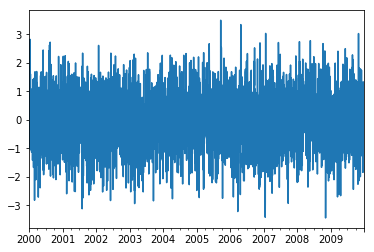

In [109]:
ts = pd.Series(np.random.randn(3650),
                index=pd.date_range('1/1/2000', periods=3650))
ts.plot()

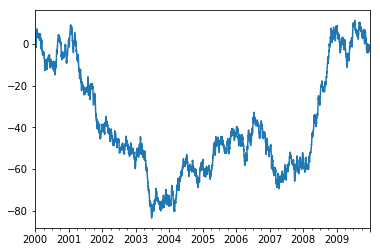

In [110]:
ts = ts.cumsum()
ts.plot()

<Figure size 432x288 with 0 Axes>

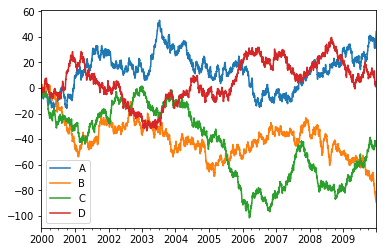

In [111]:
# On a DataFrame, the plot() method is a convenience to plot all of the columns with labels:
#
import matplotlib.pyplot as plt
df = pd.DataFrame(np.random.randn(3650, 4), index=ts.index,
                  columns=['A', 'B', 'C', 'D'])
df = df.cumsum()
plt.figure()
df.plot()
plt.legend(loc='best')

## GETTING DATA IN/OUT

### CSV

In [0]:
# Writing to a csv file
df.to_csv('foo.csv')

In [113]:
# Reading from a csv file.
pd.read_csv('foo.csv')

,Unnamed: 0,A,B,C,D
0,2000-01-01,-1.310644,0.912256,-1.440342,-1.301767
1,2000-01-02,-1.117350,1.077050,-1.615884,-2.713778
2,2000-01-03,-2.226012,0.263144,-1.170313,-2.201190
3,2000-01-04,-3.415688,2.846056,-2.751845,-2.262259
4,2000-01-05,-2.801673,2.870652,-3.147761,-2.005157
5,2000-01-06,-3.228576,-0.558988,-2.237453,-2.128700
6,2000-01-07,-3.728841,-1.003721,-3.837051,-3.928712
7,2000-01-08,-4.848737,-0.533535,-3.712013,-2.044857
8,2000-01-09,-7.302728,-1.620648,-3.557143,-0.434299
9,2000-01-10,-6.570328,-1.977811,-4.000129,0.498894


### Excel

In [0]:
# Writing to an excel file.
df.to_excel('foo.xlsx', sheet_name='Sheet1')

In [115]:
# Reading from an excel file.
pd.read_excel('foo.xlsx', 'Sheet1', index_col=None, na_values=['NA'])

,Unnamed: 0,A,B,C,D
0,2000-01-01,-1.310644,0.912256,-1.440342,-1.301767
1,2000-01-02,-1.117350,1.077050,-1.615884,-2.713778
2,2000-01-03,-2.226012,0.263144,-1.170313,-2.201190
3,2000-01-04,-3.415688,2.846056,-2.751845,-2.262259
4,2000-01-05,-2.801673,2.870652,-3.147761,-2.005157
5,2000-01-06,-3.228576,-0.558988,-2.237453,-2.128700
6,2000-01-07,-3.728841,-1.003721,-3.837051,-3.928712
7,2000-01-08,-4.848737,-0.533535,-3.712013,-2.044857
8,2000-01-09,-7.302728,-1.620648,-3.557143,-0.434299
9,2000-01-10,-6.570328,-1.977811,-4.000129,0.498894


In [0]:
# NOW IT'S TIME TO WORK WITH REAL WORLD DATA!!!